Importing the libraries needed for Decision tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import dtreeviz
import graphviz
import pydotplus

from IPython.display import Image

Loading the combined dataset that we created in data pre-processing stage for Decision tree

In [2]:
simd=pd.read_csv('./../data/processed_data/combined_dataset.csv')
simd=simd[simd['Data_Zone'].notna()]
simd.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
0,S01006506,Culter,Aberdeen City,904.0,605.0,0.07,60.0,0.07,40.0,60,...,8.437832,5.987087,5.711433,8.00642939150402,88.5666968086728,87.0,10.0,0.102113,0.011737,2016
1,S01006507,Culter,Aberdeen City,830.0,491.0,0.07,60.0,0.05,25.0,40,...,8.331833,7.262817,6.794300,4.00321469575201,48.2315023584579,85.0,4.0,0.101675,0.004785,2016
2,S01006508,Culter,Aberdeen City,694.0,519.0,0.05,30.0,0.03,15.0,45,...,7.853631,5.827924,5.251454,4.00321469575201,57.6832088725073,31.0,8.0,0.048212,0.012442,2016
3,S01006509,Culter,Aberdeen City,573.0,354.0,0.05,30.0,0.06,20.0,65,...,7.434491,8.311862,8.444698,*,*,42.0,6.0,0.072414,0.010345,2016
4,S01006510,Culter,Aberdeen City,676.0,414.0,0.10,70.0,0.07,30.0,75,...,5.141013,6.627376,6.619130,12.009644087256,177.657456912071,50.0,7.0,0.086655,0.012132,2016


Describe the dataset

In [3]:
simd.columns

Index(['Data_Zone', 'Intermediate_Zone', 'Council_area', 'Total_population',
       'Working_age_population_revised', 'Income_rate', 'Income_count',
       'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment', 'Noquals',
       'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO', 'drive_primary',
       'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post', 'PT_retail',
       'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheat_count',
       'overcrowded_rate', 'nocentralheat_rate', 'year'],
      dtype='object')

In [4]:
numeric_columns = simd.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['Total_population',
 'Working_age_population_revised',
 'Income_rate',
 'Income_count',
 'Employment_rate',
 'Employment_count',
 'ALCOHOL',
 'DRUG',
 'SMR',
 'EMERG',
 'Noquals',
 'NEET',
 'drive_petrol',
 'drive_GP',
 'drive_PO',
 'drive_primary',
 'drive_retail',
 'drive_secondary',
 'PT_GP',
 'PT_Post',
 'PT_retail',
 'overcrowded_count',
 'nocentralheat_count',
 'overcrowded_rate',
 'nocentralheat_rate',
 'year']

Correlation Matrix

In [5]:
correlation_matrix = simd[numeric_columns].corr()
correlation=correlation_matrix[correlation_matrix > 0.5].fillna(0)
pd.set_option('display.max_columns', None)
correlation

,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,ALCOHOL,DRUG,SMR,EMERG,Noquals,NEET,drive_petrol,drive_GP,drive_PO,drive_primary,drive_retail,drive_secondary,PT_GP,PT_Post,PT_retail,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
Total_population,1.00000,0.91505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Working_age_population_revised,0.91505,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Income_rate,0.00000,0.00000,1.000000,0.937342,0.960425,0.887816,0.662814,0.602498,0.539333,0.827186,0.876271,0.682559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533016,0.000000,0.580562,0.000000,0.0
Income_count,0.00000,0.00000,0.937342,1.000000,0.894768,0.951849,0.638888,0.573193,0.523268,0.780675,0.822657,0.633859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623356,0.000000,0.579494,0.000000,0.0
Employment_rate,0.00000,0.00000,0.960425,0.894768,1.000000,0.917073,0.684009,0.623805,0.526053,0.819598,0.853998,0.694087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.546828,0.000000,0.0
Employment_count,0.00000,0.00000,0.887816,0.951849,0.917073,1.000000,0.672955,0.599873,0.517058,0.760625,0.778843,0.641757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.645925,0.000000,0.602425,0.000000,0.0
ALCOHOL,0.00000,0.00000,0.662814,0.638888,0.684009,0.672955,1.000000,0.564774,0.000000,0.676842,0.569467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DRUG,0.00000,0.00000,0.602498,0.573193,0.623805,0.599873,0.564774,1.000000,0.000000,0.544279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
SMR,0.00000,0.00000,0.539333,0.523268,0.526053,0.517058,0.000000,0.000000,1.000000,0.551405,0.523992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
EMERG,0.00000,0.00000,0.827186,0.780675,0.819598,0.760625,0.676842,0.544279,0.551405,1.000000,0.810272,0.568335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Finalising the target Variable

In [6]:
final_dict={numeric_columns[i]+" "+numeric_columns[j]:correlation_matrix.iloc[i,j] for j in range(0,correlation_matrix.shape[1]) for i in range(0,correlation_matrix.shape[0]) if(correlation_matrix.iloc[i,j]>0.5 and correlation_matrix.iloc[i,j]!=1) }
for i,j in final_dict.items():
    if('Employment_count' in i):
        print(i)
        print(j)
        print("***********")

Employment_count Income_rate
0.887815947474351
***********
Employment_count Income_count
0.9518493692722477
***********
Employment_count Employment_rate
0.9170730384698288
***********
Income_rate Employment_count
0.887815947474351
***********
Income_count Employment_count
0.9518493692722477
***********
Employment_rate Employment_count
0.9170730384698288
***********
ALCOHOL Employment_count
0.672955003903953
***********
DRUG Employment_count
0.5998725638904423
***********
SMR Employment_count
0.5170577167227455
***********
EMERG Employment_count
0.7606247542539755
***********
Noquals Employment_count
0.7788434307803658
***********
NEET Employment_count
0.6417568116347189
***********
overcrowded_count Employment_count
0.6459250880939955
***********
overcrowded_rate Employment_count
0.602425266084049
***********
Employment_count ALCOHOL
0.672955003903953
***********
Employment_count DRUG
0.5998725638904423
***********
Employment_count SMR
0.5170577167227455
***********
Employment_count EM

Binning to convert target variable to categorical value

In [7]:
sorted(simd['Employment_count'].unique())
#0-110,120-230,240-340

[0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 110.0,
 111.0,
 112.0,
 113.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 130.0,
 131.0,
 135.0,
 137.0,
 138.0,
 140.0,
 143.0,
 144.0,
 145.0,
 149.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 17

Checking for non-existent class imbalance

In [8]:
trial=simd.copy()
trial['Employment_count']=trial['Employment_count'].apply(lambda x: 0 if (x >= 0 and x <= 50) else 1 if (x >= 51 and x <= 120) else 2 if x > 120 else None)
trial['Employment_count'].value_counts()

Employment_count
0    4923
1    2574
2     545
Name: count, dtype: int64

Decision tree class with helper function

In [9]:
class decisionTree:
    def __init__(self, X_train, y_train,existing_model=DecisionTreeClassifier()):
        self.model = self.fitDecisionTree(X_train, y_train,existing_model)

    def fitDecisionTree(self, X_train, y_train,new_model):
        new_model.fit(X_train, y_train)
        return new_model
    
    def predict(self,X_test):
        return self.model.predict(X_test)

    def classification_result(self, y_predict, y_test):
        report = classification_report(y_predict, y_test, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        return report_df

    def bias_variance_error(self,X_train,y_train,X_test, y_test):
        X_train,y_train,X_test,y_test=X_train.values,y_train.values,X_test.values,y_test.values
        avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
        self.model, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
        print("BIAS ERROR: ", avg_bias)
        print("VARIANCE ERROR: ", avg_variance)
        return [avg_bias,avg_variance]

    def Display_Confusion_Matrix(self, y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1', 'Predicted:2'],
                                   index=['Actual:0', 'Actual:1', 'Actual:2'])
        plt.figure(figsize=(8, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm")
        plt.show()

    def Confusion_Matrix_Metrics(self,y_test,y_pred, class_number):
        cm = confusion_matrix(y_test,y_pred)
        if class_number == 0:
            TP = cm[0, 0]
            FN = cm[0, 1] + cm[0, 2]
            FP = cm[1, 0] + cm[2, 0]
            TN = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]
        elif class_number == 1:
            TP = cm[1, 1]
            FN = cm[1, 0] + cm[1, 2]
            FP = cm[0, 1] + cm[2, 1]
            TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]
        elif class_number == 2:
            TP = cm[2, 2]
            FN = cm[2, 0] + cm[2, 1]
            FP = cm[0, 2] + cm[1, 2]
            TN = cm[0, 0] + cm[1, 1] + cm[1, 0] + cm[0, 1]
        else:
            raise ValueError("Invalid Class number")

        sensitivity = TP / float(TP + FN)
        specificity = TN / float(TN + FP)
        print('Sensitivity or True Positive Rate = TP / (TP+FN) = ', sensitivity, '\n\n',
              'Specificity or True Negative Rate = TN / (TN+FP) = ', specificity, '\n\n',
              'Positive Predictive value = TP / (TP+FP) = ', TP / float(TP + FP), '\n\n',
              'Negative predictive Value = TN / (TN+FN) = ', TN / float(TN + FN), '\n\n',
              'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ', sensitivity / (1 - specificity), '\n\n',
              'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ', (1 - sensitivity) / specificity)


Training the base model

In [10]:
X = trial.drop('Employment_count', axis=1)
y = trial['Employment_count']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101)
X_validation,X_test,y_validation,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=20)

encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object' :
        X_train[column] = encoder.fit_transform(X_train[column])
    if X_test[column].dtype=='object':
        X_test[column] = encoder.fit_transform(X_test[column])
    if X_validation[column].dtype == 'object':
        X_validation[column] = encoder.fit_transform(X_validation[column])

base_model=decisionTree(X_train,y_train)
base_predictions=base_model.predict(X_test)

base_model.classification_result(base_predictions,y_test)

,precision,recall,f1-score,support
0,0.972946,0.973922,0.973434,997.000000
1,0.925926,0.916988,0.921435,518.000000
2,0.836735,0.872340,0.854167,94.000000
accuracy,0.949658,0.949658,0.949658,0.949658
macro avg,0.911869,0.921084,0.916345,1609.000000
weighted avg,0.949851,0.949658,0.949726,1609.000000


Display more evaluation criterias

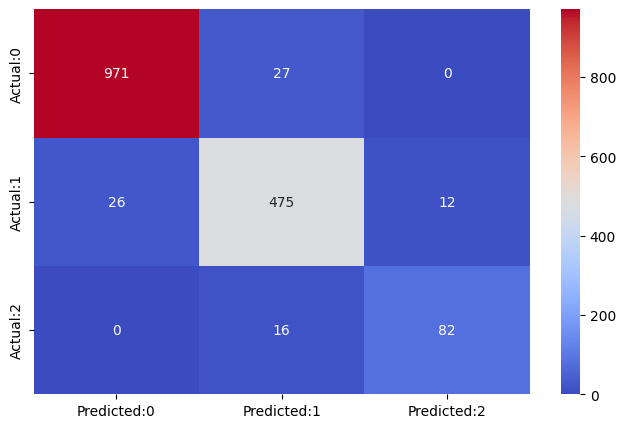

In [11]:
base_model.Display_Confusion_Matrix(y_test,base_predictions)

In [12]:
for index in range (0,3):
    print(f"For class {index}")
    print("----------------------------------------------------")
    base_model.Confusion_Matrix_Metrics(y_test,base_predictions,index)
    print("----------------------------------------------------")

For class 0
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9729458917835672 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9574468085106383 

 Positive Predictive value = TP / (TP+FP) =  0.9739217652958877 

 Negative predictive Value = TN / (TN+FN) =  0.9558823529411765 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  22.864228456913857 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.028256513026052074
----------------------------------------------------
For class 1
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9259259259259259 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9607664233576643 

 Positive Predictive value = TP / (TP+FP) =  0.916988416988417 

 Negative predictive Value = TN / (TN+FN) =  0.9651695692025665 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  23.60034453057711 

 Negative li

Implementing recursive feature elimination

In [13]:
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X_train.fillna(0), y_train)
features_rank = pd.DataFrame({'Feature':X_train.columns,'Rank':selector.ranking_})
features_rank.sort_values(by='Rank')

,Feature,Rank
0,Data_Zone,1
34,nocentralheat_rate,1
25,drive_secondary,1
26,PT_GP,1
30,crime_rate,1
10,DRUG,1
18,NEET,1
8,CIF,1
9,ALCOHOL,1
6,Income_count,1


Rebuilding the model with selected features

In [14]:
X_train=X_train[list(features_rank[features_rank['Rank']==1]['Feature'].values)]
X_test=X_test[list(features_rank[features_rank['Rank']==1]['Feature'].values)]

Trimmed_model=decisionTree(X_train,y_train)
Trimmed_model_predictions=Trimmed_model.predict(X_test)

Trimmed_model.classification_result(y_test,Trimmed_model_predictions)

,precision,recall,f1-score,support
0,0.972112,0.977956,0.975025,998.000000
1,0.940828,0.929825,0.935294,513.000000
2,0.918367,0.918367,0.918367,98.000000
accuracy,0.958981,0.958981,0.958981,0.958981
macro avg,0.943769,0.942049,0.942895,1609.000000
weighted avg,0.958864,0.958981,0.958907,1609.000000


More evaluation on trimmed model

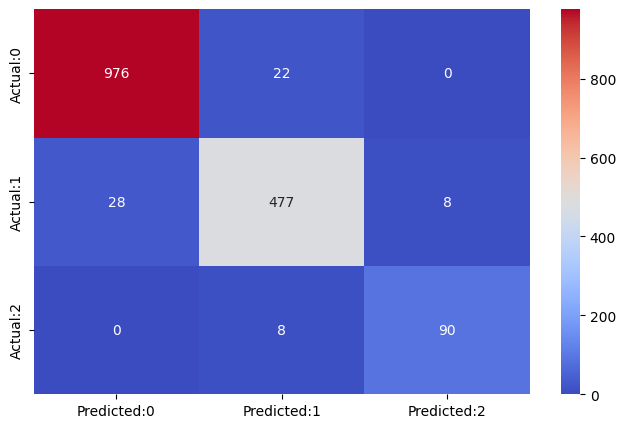

In [15]:
Trimmed_model.Display_Confusion_Matrix(y_test,Trimmed_model_predictions)

In [16]:

for index in range (0,3):
    print(f"For class {index}")
    print("----------------------------------------------------")
    Trimmed_model.Confusion_Matrix_Metrics(y_test,Trimmed_model_predictions,index)
    print("----------------------------------------------------")

For class 0
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9779559118236473 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9541734860883797 

 Positive Predictive value = TP / (TP+FP) =  0.9721115537848606 

 Negative predictive Value = TN / (TN+FN) =  0.9636363636363636 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  21.340395075866017 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.023102809392369666
----------------------------------------------------
For class 1
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9298245614035088 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9726277372262774 

 Positive Predictive value = TP / (TP+FP) =  0.9408284023668639 

 Negative predictive Value = TN / (TN+FN) =  0.9673321234119783 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  33.96959064327486 

 Negative l

#### Our bias error is low and variance is high, which is typical for Decision Tree Models, being prone to overfitting. Considering the bias-variance trade-off, we can try to reduce the variance and slightly increase the bias

In [17]:
bias_variance_before_pruning=Trimmed_model.bias_variance_error(X_train,y_train,X_test, y_test)

BIAS ERROR:  0.036047234307022995
VARIANCE ERROR:  0.05248290863890615


### Let us use pruning, a  technique to help resolve overfitting

In [18]:
params = {'max_depth': [2,4,6,8,10,12,14,16,18,20],
         'min_samples_split': [2,3,4,5,6,7],
         'min_samples_leaf': [1,2,3,4,5]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

#### After getting the optimal set of hyperparameters, build the pruned decision tree and make predictions and display evaluation metrics

In [19]:
Pruned_Decision_Tree=decisionTree(X_train,y_train,gcv.best_estimator_)
Pruned_predictions=Pruned_Decision_Tree.predict(X_test)

Pruned_Decision_Tree.classification_result(y_test,Pruned_predictions)

,precision,recall,f1-score,support
0,0.975075,0.979960,0.977511,998.000000
1,0.938976,0.929825,0.934378,513.000000
2,0.887755,0.887755,0.887755,98.000000
accuracy,0.958359,0.958359,0.958359,0.958359
macro avg,0.933935,0.932513,0.933215,1609.000000
weighted avg,0.958247,0.958359,0.958292,1609.000000


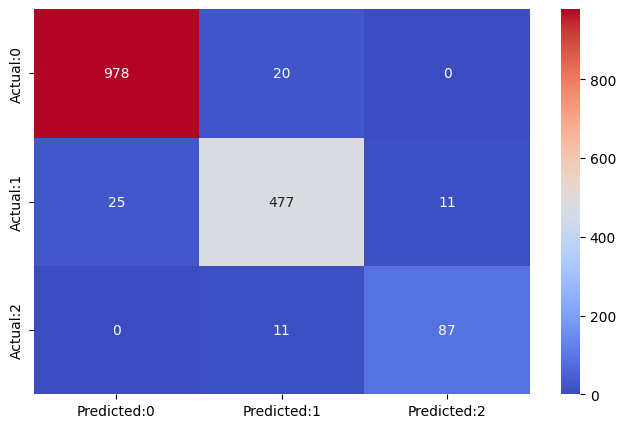

In [20]:
Pruned_Decision_Tree.Display_Confusion_Matrix(y_test,Pruned_predictions)

In [21]:
for index in range (0,3):
    print(f"For class {index}")
    print("----------------------------------------------------")
    Pruned_Decision_Tree.Confusion_Matrix_Metrics(y_test,Pruned_predictions,index)
    print("----------------------------------------------------")

For class 0
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9799599198396793 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9590834697217676 

 Positive Predictive value = TP / (TP+FP) =  0.9750747756729811 

 Negative predictive Value = TN / (TN+FN) =  0.966996699669967 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  23.950220440881772 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.020895032385590314
----------------------------------------------------
For class 1
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9298245614035088 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9717153284671532 

 Positive Predictive value = TP / (TP+FP) =  0.9389763779527559 

 Negative predictive Value = TN / (TN+FN) =  0.9673024523160763 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  32.87379739671756 

 Negative li

In [22]:
bias_variance_after_pruning=Pruned_Decision_Tree.bias_variance_error(X_train,y_train,X_test, y_test)

BIAS ERROR:  0.031075201988812928
VARIANCE ERROR:  0.0473088875077688


In [23]:
pd.DataFrame({'BIAS ERROR':[bias_variance_before_pruning[0],bias_variance_after_pruning[0]],'VARIANCE ERROR':[bias_variance_before_pruning[1],bias_variance_after_pruning[1]],'MODEL STAGE':['Before Pruning','After Pruning']})

,BIAS ERROR,VARIANCE ERROR,MODEL STAGE
0,0.036047,0.052483,Before Pruning
1,0.031075,0.047309,After Pruning


##### We can see that both our variance and bias have slightly decreased. Thus the model overfitting has been reduced by a marginal amount.
### Now, let us finally test our pruned decision tree on unseen data

In [24]:
X_validation=X_validation[list(features_rank[features_rank['Rank']==1]['Feature'].values)]
y_pred_validation=Pruned_Decision_Tree.predict(X_validation)
Pruned_Decision_Tree.classification_result(y_pred_validation,y_validation)

c:\Users\akars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


,precision,recall,f1-score,support
0,0.965243,0.974925,0.970060,997.000000
1,0.931535,0.885602,0.907988,507.000000
2,0.806723,0.923077,0.860987,104.000000
accuracy,0.943408,0.943408,0.943408,0.943408
macro avg,0.901167,0.927868,0.913011,1608.000000
weighted avg,0.944363,0.943408,0.943434,1608.000000


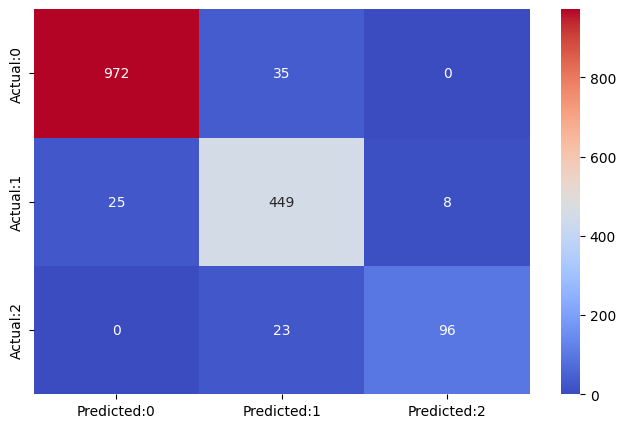

In [25]:
Pruned_Decision_Tree.Display_Confusion_Matrix(y_validation,y_pred_validation)

In [26]:
for index in range (0,3):
    print(f"For class {index}")
    print("----------------------------------------------------")
    Pruned_Decision_Tree.Confusion_Matrix_Metrics(y_validation,y_pred_validation,index)
    print("----------------------------------------------------")

For class 0
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9652432969215492 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9584026622296173 

 Positive Predictive value = TP / (TP+FP) =  0.9749247743229689 

 Negative predictive Value = TN / (TN+FN) =  0.9427168576104746 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  23.204448857994063 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.036265240538453
----------------------------------------------------
For class 1
----------------------------------------------------
Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9315352697095436 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9484902309058615 

 Positive Predictive value = TP / (TP+FP) =  0.8856015779092702 

 Negative predictive Value = TN / (TN+FN) =  0.9700272479564033 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  18.084632994705977 

 Negative lik

Decision tree for substance abuse

<Axes: xlabel='ALCOHOL', ylabel='Density'>

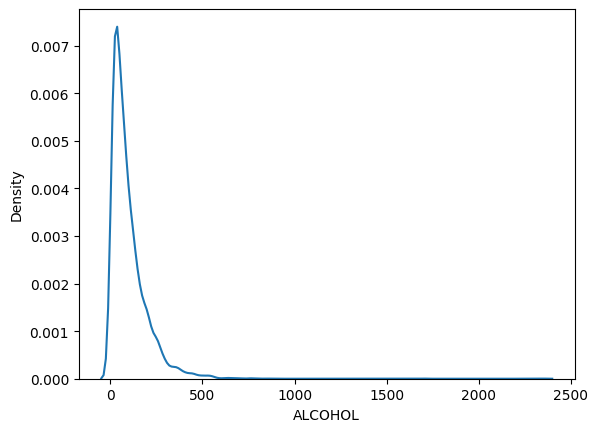

In [31]:
sns.kdeplot(simd.ALCOHOL)

Based on the peak value we chose threshold of 300 for alcohol

<Axes: xlabel='DRUG', ylabel='Density'>

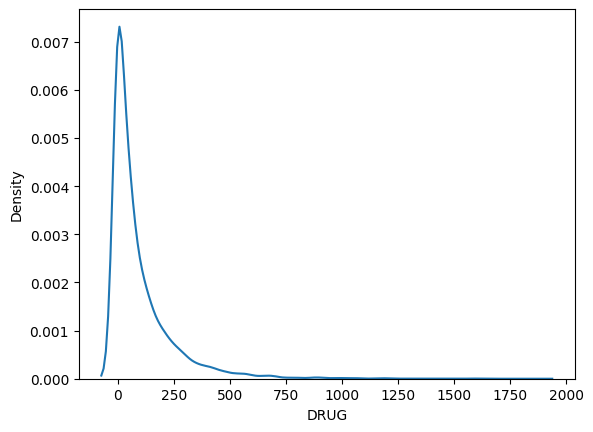

In [32]:
sns.kdeplot(simd.DRUG)

Based on the peak value we can see it peaks around 100 but as the data is extremely spreadout hence variance becomes extremely high so we decided on a threshold of 500 for drug

Binning, training and producing model

In [27]:
# csv file
data =simd.copy()

data=data[data['ALCOHOL'].notna()]

# Define substance_abuse on thresholds
AlcoholAbuse_threshold = 300
DrugAbuse_threshold = 500

def categorize_substance_abuse(row):
    if row['ALCOHOL'] > AlcoholAbuse_threshold and row['DRUG'] > DrugAbuse_threshold:
        return "High"
    elif row['ALCOHOL'] > AlcoholAbuse_threshold or row['DRUG'] > DrugAbuse_threshold:
        return "Moderate"
    else:
        return "Low"

# Add new column "Substance Abuse" based on the criteria
data['Substance_Abuse'] = data.apply(categorize_substance_abuse, axis=1)

# Define categories in 'Substance Abuse'
class_names = ['Low', 'Moderate', 'High']

#Defining target
target = data['Substance_Abuse']

features = data[['DEPRESS', 'EMERG', 'Noquals']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

#Encoding data to handle categoricals
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
min_samples_split=5
max_depth=5

#fitting data to model
model = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

Checking accuracy of the model

In [28]:
#Encoding data to handle categoricals
label_encoder = LabelEncoder()
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = label_encoder.fit_transform(X_test[col])
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)

print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 93.99%


Producing confusion matrix

In [29]:
# Doing more evaluation metrics
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        21
         Low       0.94      1.00      0.97      2273
    Moderate       0.29      0.03      0.06       119

    accuracy                           0.94      2413
   macro avg       0.41      0.34      0.34      2413
weighted avg       0.90      0.94      0.92      2413

Confusion Matrix:
[[   0   17    4]
 [   3 2264    6]
 [   0  115    4]]


Note:Install graphviz for a local run of the below code.

generating image for the decision tree

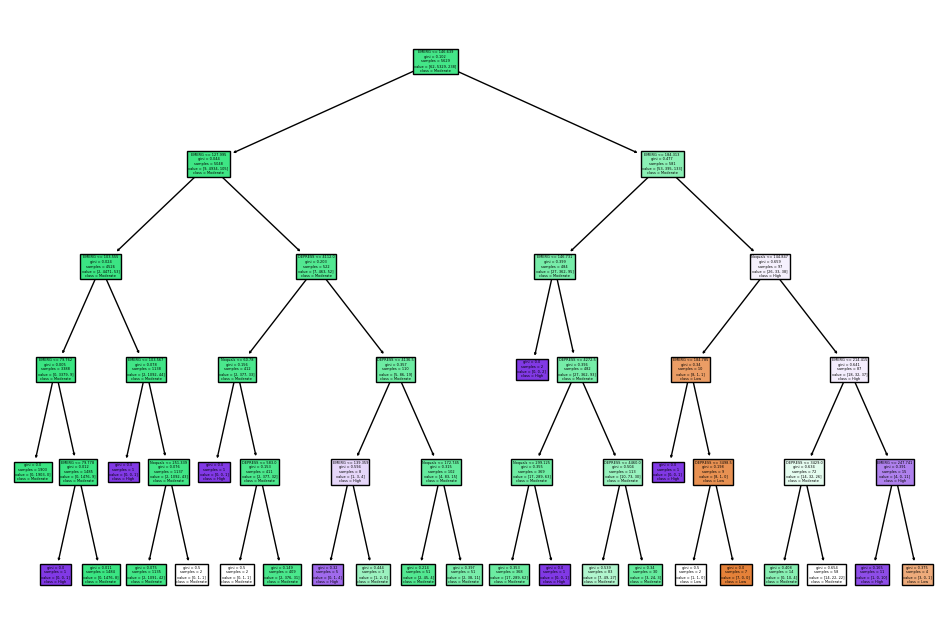

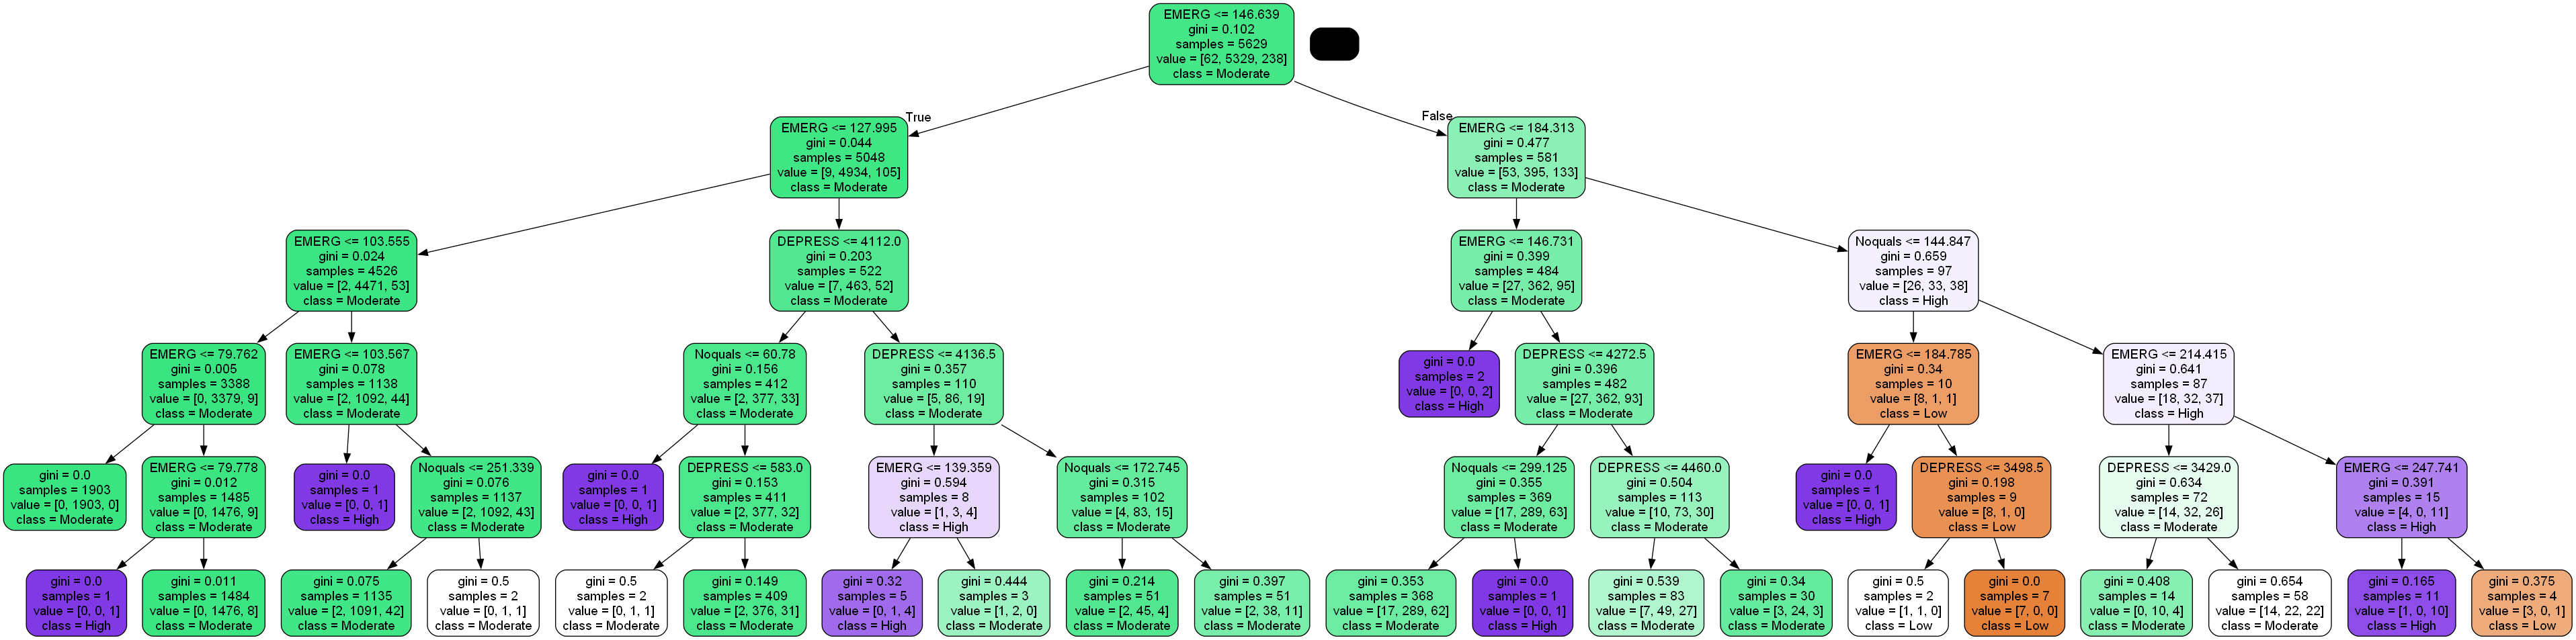

In [30]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['DEPRESS', 'EMERG', 'Noquals'], class_names=class_names)
plt.show()

# The Decision Tree in Graphviz format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=['DEPRESS', 'EMERG', 'Noquals'],
                           class_names=class_names,
                           filled=True, rounded=True)

# Display the graph image of the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
